### Testing several supervised learning algorithms 

#### Prediction tast: Predicting whether an individual makes more than $50,000

In [1]:
import numpy as np
import pandas as pd
from time import time

import seaborn as sns
import matplotlib.pyplot as plt

### - Data Visualization 

In [2]:
data = pd.read_csv("dataset/census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
n_records = len(data)
n_greater_50k = len(data[data['income'] == '>50K'])
n_at_most_50k = len(data[data['income'] == '<=50K'])
greater_percent = 100 * n_greater_50k / n_records

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


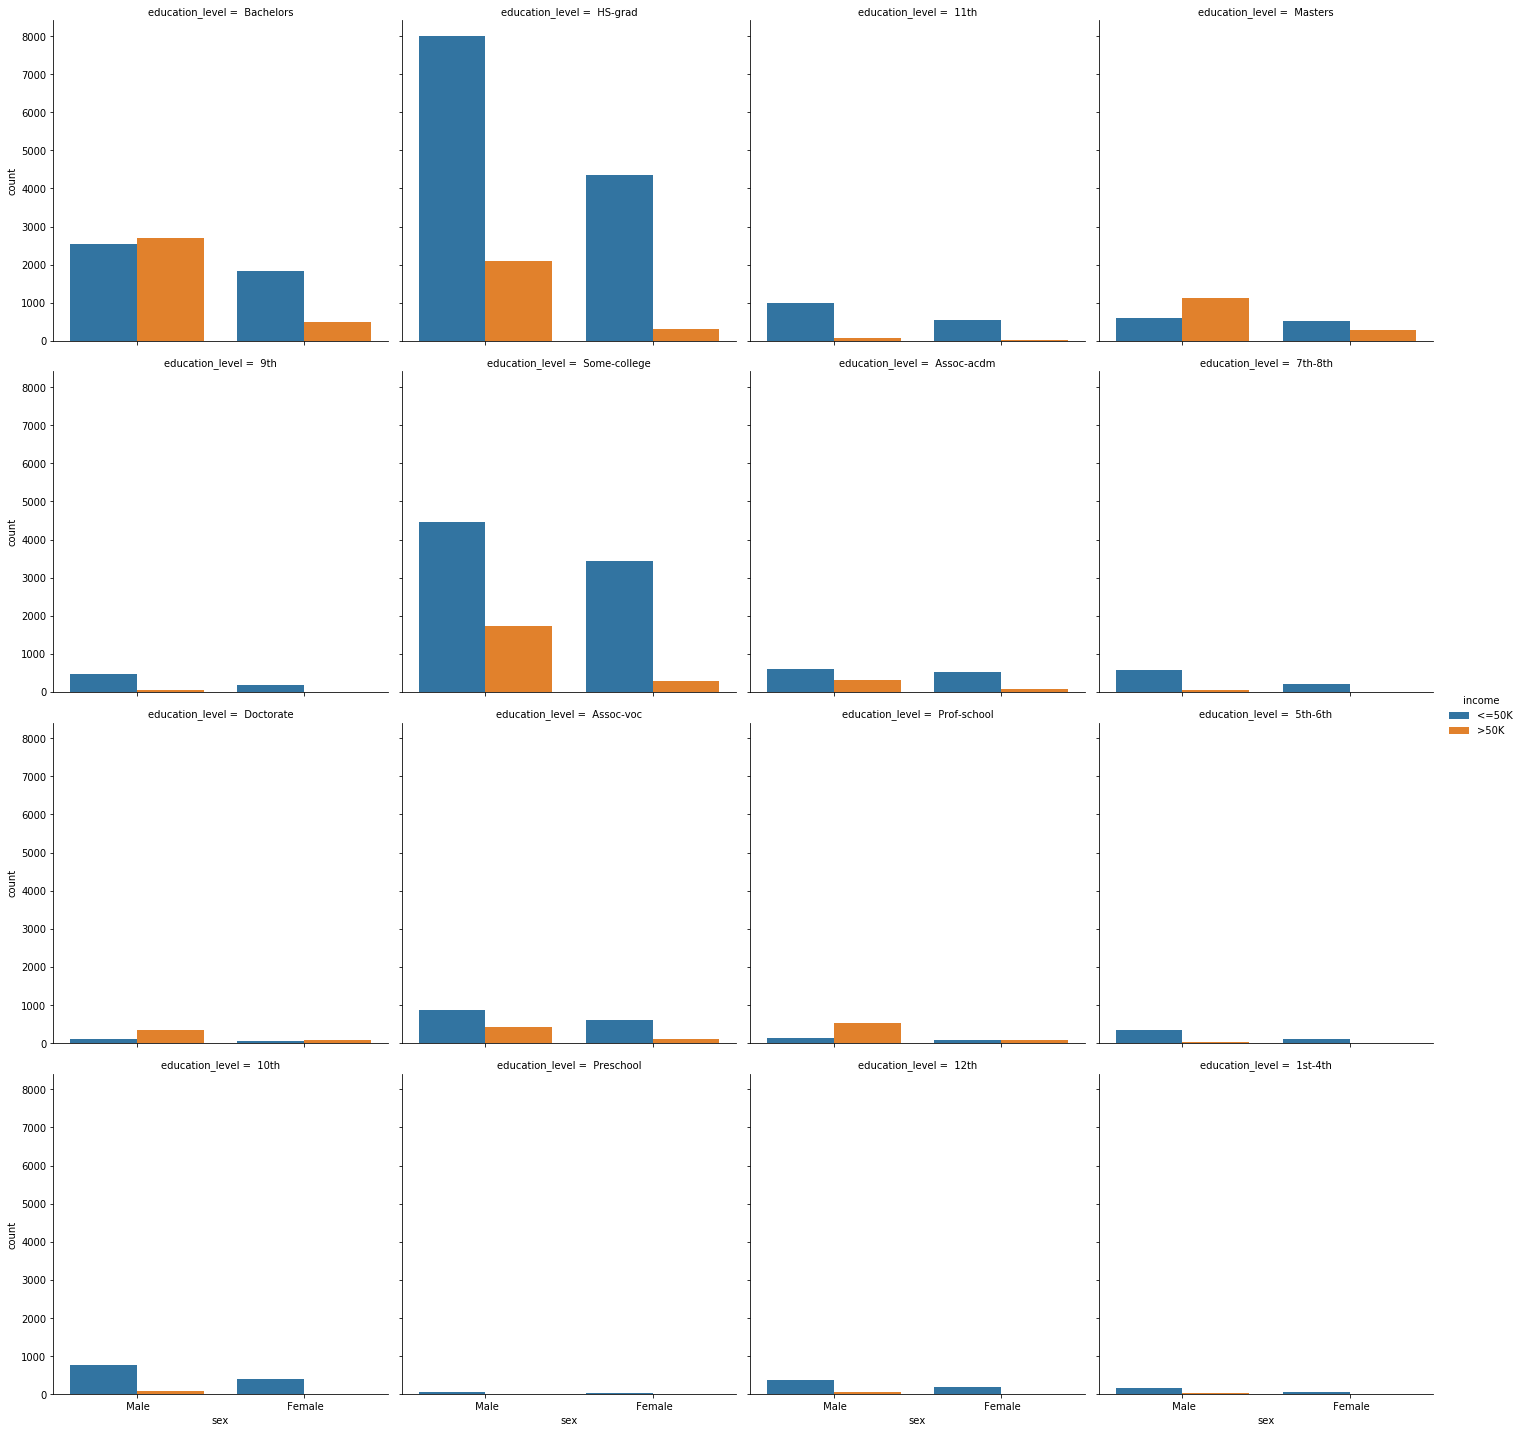

In [5]:
sns.catplot("sex", col='education_level', data=data, hue='income', kind="count", col_wrap=4)

### - Data Preprocessing

#### Transforming Skewed Continuous Features

Text(0.5, 1.0, 'Capital-loss Feauture Distribution')

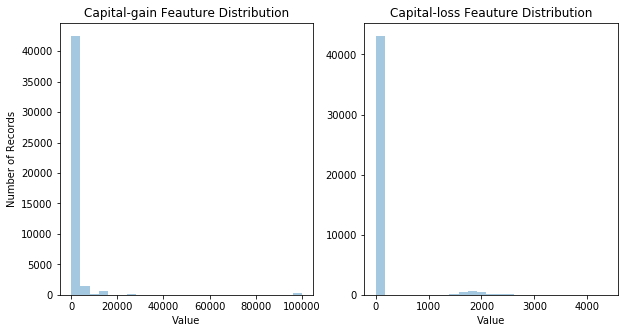

In [45]:
fig, ax =plt.subplots(1,2,figsize = (10,5))

sns.distplot(data["capital-gain"],kde=False, bins=25, ax=ax[0])
sns.distplot(data["capital-loss"],kde=False, bins=25, ax=ax[1])

ax[0].set_ylabel("Number of Records")
ax[0].set_xlabel("Value")
ax[0].set_title("Capital-gain Feauture Distribution")

ax[1].set_xlabel("Value")
ax[1].set_title("Capital-loss Feauture Distribution")

#### Using Logarithmic transformation to reduce the range of values caused by outliers

In [59]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

#### Normalazing Numerical feautures

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


#### Encoding Categorical values

In [9]:
features = pd.get_dummies(features_raw)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [10]:
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Preparing training and testing data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

### - Defining the Models

#### Naive Prediction

In [13]:
accuracy = n_greater_50k / n_records
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)
recall = n_greater_50k / (n_greater_50k + 0)
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


#### Defining a Training and Predicting Pipeline

In [14]:
from sklearn.metrics import fbeta_score, accuracy_score

In [15]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    ## Training the model
    start = time() 
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() 
    
    # training time
    results['train_time'] = end - start
        
    ## Model Prediction
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    # Prediction time
    results['pred_time'] = end - start
            
    # Prediction Accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Prediction Accuracy
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # F-Score
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
              
    return results

#### Defining the models

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [17]:
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

In [18]:
## Defining three types of sample data for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

#### Initializing the models

In [19]:
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

### - Models Performance Visualization

#### Preparing data for visualization

In [20]:
test_data = pd.DataFrame(columns=["learners","train_size","train_time","pred_time","acc_train",
                                  "acc_test","f_train","f_test"])
for i in results:
    for j in results[i]:
        test_data =test_data.append({"learners": i,"train_size":j,"train_time":results[i][j]['train_time'],
                                     "pred_time":results[i][j]["pred_time"],"acc_train":results[i][j]['acc_train'],
                                     "acc_test":results[i][j]['acc_test'],"f_train":results[i][j]['f_train'],
                                     "f_test":results[i][j]['f_test']},ignore_index=True)
            

test_data["train_size"] = test_data.train_size.map({0:"1%",1:"10%",2:"100%"})
test_data

,learners,train_size,train_time,pred_time,acc_train,acc_test,f_train,f_test
0,DecisionTreeClassifier,1%,0.008974,0.010970,1.000000,0.754008,1.000000,0.505562
1,DecisionTreeClassifier,10%,0.026928,0.008979,0.996667,0.806412,0.997191,0.603410
2,DecisionTreeClassifier,100%,0.382940,0.008976,0.970000,0.817247,0.963855,0.625174
3,SVC,1%,0.007979,0.166555,0.800000,0.798673,0.520833,0.550614
4,SVC,10%,0.684676,1.470068,0.796667,0.797899,0.474138,0.527610
5,SVC,100%,90.185068,16.412140,0.796667,0.796683,0.500000,0.540070
6,AdaBoostClassifier,1%,0.078755,0.195476,0.896667,0.810392,0.811688,0.610473
7,AdaBoostClassifier,10%,0.334107,0.215453,0.840000,0.849862,0.680147,0.701882
8,AdaBoostClassifier,100%,2.531202,0.192485,0.850000,0.857601,0.711538,0.724551


#### Speed performance

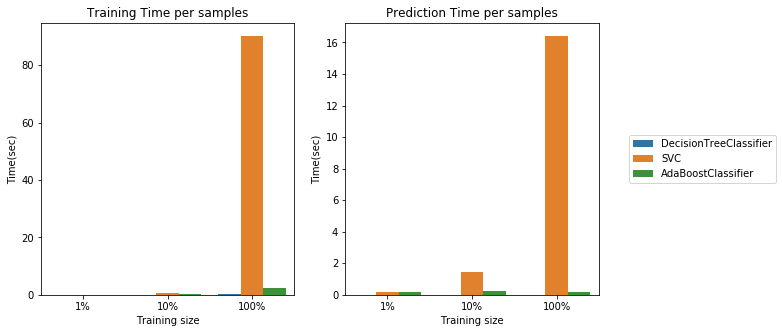

In [22]:
fig, ax =plt.subplots(1,2,figsize = (10,5))

sns.barplot(x="train_size",y="train_time",data=test_data,hue="learners", ax=ax[0])
sns.barplot(x="train_size", y="pred_time",data=test_data,hue ="learners",ax=ax[1] )

ax[0].set_ylabel("Time(sec)")
ax[0].set_xlabel("Training size")
ax[0].set_title("Training Time per samples")
ax[0].legend().remove()

ax[1].set_ylabel("Time(sec)")
ax[1].set_xlabel("Training size")
ax[1].set_title("Prediction Time per samples")
ax[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=1)


#### Accuracy Results

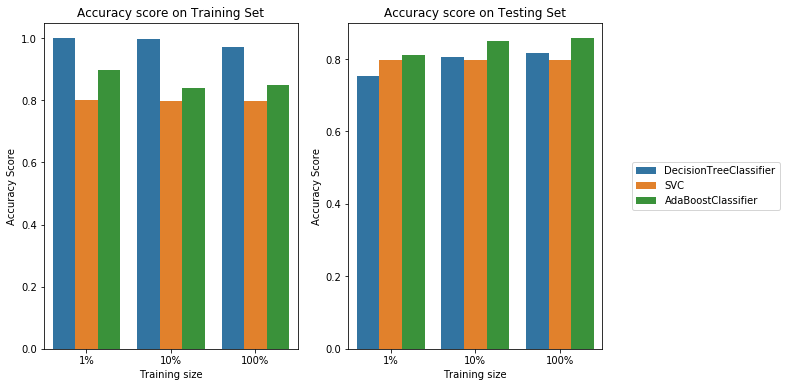

In [23]:
fig, ax =plt.subplots(1,2,figsize = (10,6))

sns.barplot(x="train_size",y="acc_train",data=test_data,hue="learners", ax=ax[0])
sns.barplot(x="train_size",y="acc_test",data=test_data,hue="learners", ax=ax[1])

ax[0].set_ylabel("Accuracy Score")
ax[0].set_xlabel("Training size")
ax[0].set_title("Accuracy score on Training Set")
ax[0].legend().remove()

ax[1].set_ylabel("Accuracy Score")
ax[1].set_xlabel("Training size")
ax[1].set_title("Accuracy score on Testing Set")
ax[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=1)

#### F-score

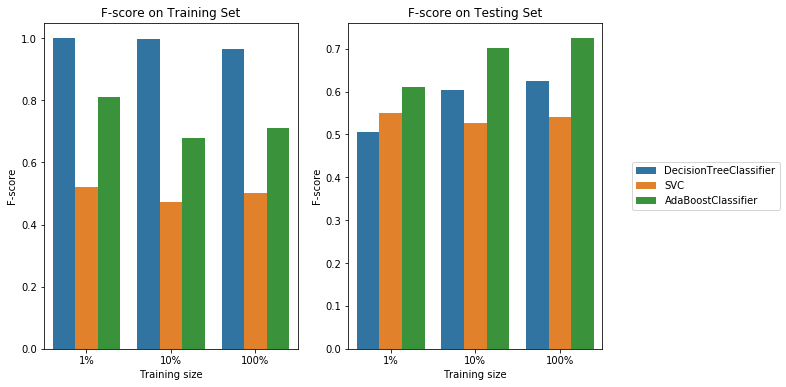

In [24]:
fig, ax =plt.subplots(1,2,figsize = (10,6))

sns.barplot(x="train_size",y="f_train",data=test_data,hue="learners", ax=ax[0])
sns.barplot(x="train_size",y="f_test",data=test_data,hue="learners", ax=ax[1])

ax[0].set_ylabel("F-score")
ax[0].set_xlabel("Training size")
ax[0].set_title("F-score on Training Set")
ax[0].legend().remove()

ax[1].set_ylabel("F-score")
ax[1].set_xlabel("Training size")
ax[1].set_title("F-score on Testing Set")
ax[1].legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=1)

#### Visualizinf the confusion Matrices for the models

In [63]:
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
    print("Prediction Model: ",model.__class__.__name__)
    print(cm)
    print("\n")

Prediction Model:  DecisionTreeClassifier
[[0.88318713 0.11681287]
 [0.38730159 0.61269841]]


Prediction Model:  SVC
[[0.96739766 0.03260234]
 [0.73287982 0.26712018]]


Prediction Model:  AdaBoostClassifier
[[0.93947368 0.06052632]
 [0.39637188 0.60362812]]




### - Conclusion

Looking at the results above, out of the three models, AdaBoost is the most appropriate for our task.

Firstly, the model gave the best results on the testing data, in terms of both accuracy and f-score. It also took reasonable low time to train on the full dataset, which is just a fraction of the 120 seconds taken by SVC and it gave second best results on the training set, so it should scale well even if we have more data.

Using grid search (GridSearchCV) with different parameter/value combinations, we can tune our model for even better results.

The Second best model is the Decision Tree classifier, considering the fact that it performed better than the SVC on larger dataset 
The model gave slightly better performance than the SVC, but in terms of speed it performed much better, characteristic for this model is that it performed much better on the training dataset (best performance from all the models) so is prone to overfitting.

Considering the SVC, from the graphs in terms of accuracy we can conclude that the model gave constant (solidly good) performance for all the datasets
